In [60]:
import numpy as np, numpy.random
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers

n_portfolio = 100
n_asset = 3

# generate random matrix
rand_matrix = np.random.random((n_portfolio, n_asset))
print rand_matrix

[[0.91291472 0.9400033  0.72860311]
 [0.75821622 0.90811895 0.41190763]
 [0.69952319 0.04128783 0.049065  ]
 [0.56767687 0.35969041 0.43534642]
 [0.03474158 0.50716271 0.22097055]
 [0.94901478 0.56664602 0.80585784]
 [0.61485861 0.75548352 0.96993498]
 [0.67975316 0.0017119  0.49751825]
 [0.11452372 0.28130162 0.58326447]
 [0.47234592 0.44758105 0.99136677]
 [0.07405947 0.19310806 0.91486578]
 [0.21139245 0.31249257 0.37220779]
 [0.16716517 0.17425461 0.3097125 ]
 [0.30716167 0.95469665 0.17125215]
 [0.10384403 0.22919818 0.90969537]
 [0.637166   0.39459657 0.40780803]
 [0.1506099  0.45010706 0.63345022]
 [0.27791654 0.12104044 0.75041236]
 [0.93457834 0.34257632 0.32184755]
 [0.22198024 0.18724797 0.55887339]
 [0.05589686 0.2687899  0.8540255 ]
 [0.76459657 0.12818962 0.21007491]
 [0.41681368 0.23495882 0.90197118]
 [0.94482029 0.64831581 0.16648846]
 [0.48698224 0.99263291 0.31759136]
 [0.46597098 0.68396739 0.43804266]
 [0.38338779 0.18342552 0.99610934]
 [0.99107518 0.93852003 0.83

In [61]:
# create 100 portfolios
portfolio = np.zeros((n_portfolio, n_asset))
i = 0
for row in rand_matrix:
    row_sum = np.sum(row)
    j = 0
    for col in row:
        portfolio[i][j] = col/row_sum
        j += 1
    i += 1
print portfolio

[[0.35363442 0.36412768 0.2822379 ]
 [0.36483524 0.4369648  0.19819995]
 [0.88561138 0.05227128 0.06211734]
 [0.41657824 0.26395156 0.3194702 ]
 [0.04554034 0.6648046  0.28965505]
 [0.40879051 0.2440842  0.34712529]
 [0.26272898 0.32281798 0.41445305]
 [0.57655876 0.00145201 0.42198922]
 [0.11696958 0.28730931 0.59572111]
 [0.24713413 0.23417701 0.51868886]
 [0.0626543  0.16336939 0.77397631]
 [0.23590464 0.3487279  0.41536746]
 [0.25672996 0.26761784 0.4756522 ]
 [0.21433216 0.66617101 0.11949682]
 [0.08356071 0.18443007 0.73200922]
 [0.44260837 0.27410713 0.2832845 ]
 [0.12203363 0.36470509 0.51326128]
 [0.24179916 0.10531031 0.65289053]
 [0.58447595 0.21424381 0.20128024]
 [0.22929437 0.19341768 0.57728795]
 [0.04742197 0.22803691 0.72454112]
 [0.69328456 0.1162337  0.19048175]
 [0.26826412 0.15122109 0.58051479]
 [0.53694425 0.36843985 0.0946159 ]
 [0.27096621 0.55231989 0.17671389]
 [0.29343611 0.43071509 0.2758488 ]
 [0.24530183 0.11736059 0.63733758]
 [0.35807118 0.33908323 0.30

In [62]:
assets = [0.1, 0.2, 0.15]
# find expected return of each portfolio
E = np.dot(portfolio, assets)
print E

[0.15052466 0.15360648 0.10833299 0.14236867 0.18096321 0.14176468
 0.15300445 0.12124466 0.15851699 0.14935214 0.15503575 0.15564116
 0.15054439 0.17259194 0.15504347 0.14157494 0.16213357 0.14317556
 0.13148839 0.14820617 0.15903075 0.12114746 0.14414785 0.14157478
 0.16406768 0.15686395 0.14360294 0.1490506  0.16287967 0.15213771
 0.16729749 0.15495049 0.12496241 0.14434923 0.14592646 0.15239268
 0.14284741 0.160364   0.15462213 0.15134293 0.18493335 0.14467648
 0.14646278 0.16162857 0.1397042  0.19124257 0.14782266 0.13236911
 0.15859466 0.14652531 0.12779673 0.14247613 0.1558774  0.14656404
 0.13368062 0.14194325 0.15154911 0.14977807 0.15874904 0.14723354
 0.15387737 0.14580433 0.16195605 0.13335675 0.14099006 0.1530748
 0.17305911 0.16113689 0.1305123  0.13563617 0.15765997 0.15901338
 0.14662093 0.12755556 0.15216561 0.14233119 0.16804112 0.15190724
 0.16058189 0.13287955 0.16377903 0.15834051 0.13920312 0.16282108
 0.12052653 0.13987823 0.16262719 0.17876726 0.15812952 0.15150

In [63]:
# covariance
C = np.array([[0.005, -0.01, 0.004], [-0.01, 0.04, -0.002], [0.004, -0.002, 0.023]])
print C

[[ 0.005 -0.01   0.004]
 [-0.01   0.04  -0.002]
 [ 0.004 -0.002  0.023]]


In [64]:
# find variance of all portfolio
variance = np.zeros((n_portfolio, 1))
i = 0
for row in portfolio:
    variance[i] = np.dot(np.dot(row, C), row.T)
    i += 1
print variance

[[0.00557301]
 [0.00625022]
 [0.00362084]
 [0.00453016]
 [0.01834844]
 [0.00479075]
 [0.007104  ]
 [0.00768513]
 [0.01073329]
 [0.00806897]
 [0.01454257]
 [0.00767006]
 [0.00749159]
 [0.01534031]
 [0.01336085]
 [0.00409668]
 [0.01031611]
 [0.01101871]
 [0.00274014]
 [0.00914964]
 [0.01356306]
 [0.00313439]
 [0.00910884]
 [0.00338772]
 [0.0102871 ]
 [0.00724583]
 [0.01057014]
 [0.00537807]
 [0.01202037]
 [0.00610119]
 [0.01171858]
 [0.00670527]
 [0.00304942]
 [0.00553911]
 [0.0083627 ]
 [0.006085  ]
 [0.00781317]
 [0.00909089]
 [0.0072695 ]
 [0.00563724]
 [0.02081503]
 [0.00409343]
 [0.00740388]
 [0.01195776]
 [0.00433065]
 [0.02766877]
 [0.00694265]
 [0.00205511]
 [0.00814232]
 [0.00492154]
 [0.00174148]
 [0.00579858]
 [0.00693341]
 [0.00614686]
 [0.00253756]
 [0.00406561]
 [0.01001931]
 [0.0053028 ]
 [0.00815594]
 [0.00456766]
 [0.00635252]
 [0.01006631]
 [0.00921376]
 [0.0060843 ]
 [0.00344816]
 [0.00617078]
 [0.01389519]
 [0.01061023]
 [0.00694592]
 [0.0028629 ]
 [0.00791329]
 [0.00

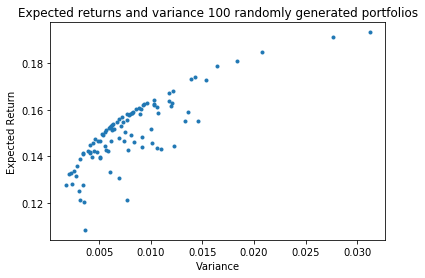

In [65]:
plt.plot(variance, E, 'o', markersize=3)
plt.xlabel('Variance')
plt.ylabel('Expected Return')
plt.title('Expected returns and variance 100 randomly generated portfolios')
plt.show()